In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
data = pd.read_csv('input/Billionaire.csv')
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [3]:
data = data.dropna().reset_index()
data['NetWorth'] = data['NetWorth'].str.strip('$')
data['NetWorth'] = data['NetWorth'].str.strip('B').to_numpy(dtype=float)
df = data.sort_values(by=['NetWorth'], ascending=False).head(10)
df.head()

,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


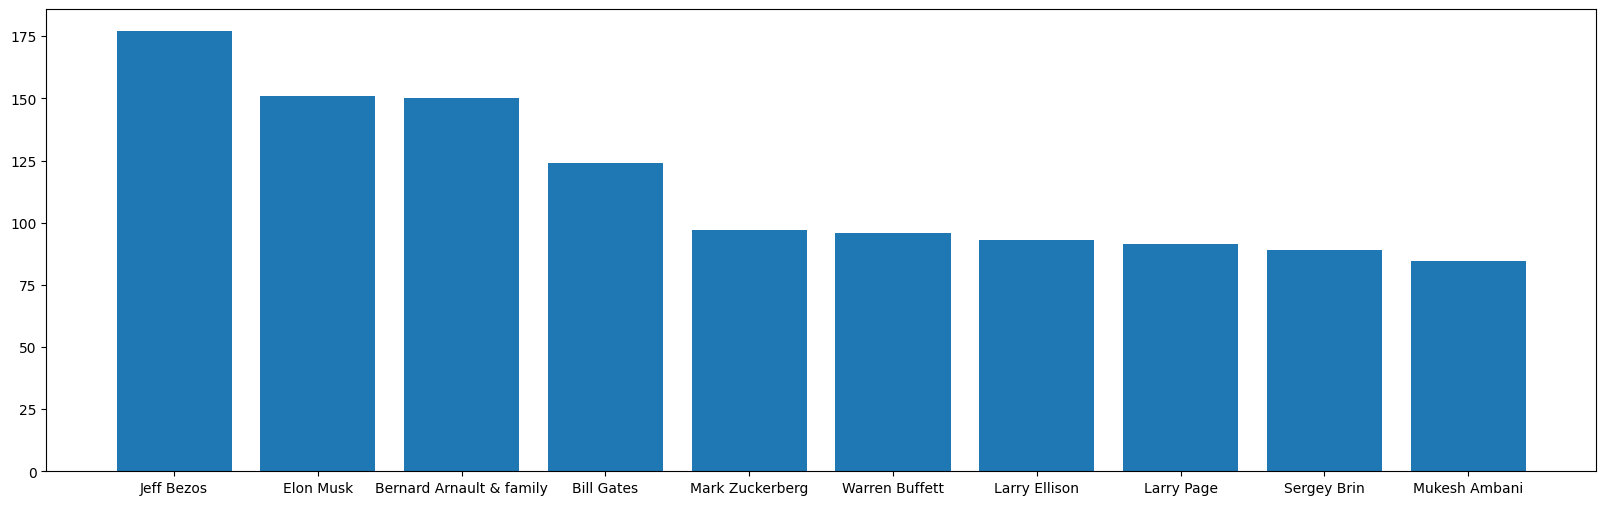

In [4]:
plt.figure(figsize=(20,6))
plt.bar(df['Name'], df['NetWorth'])
plt.show()

## Mean and variance of age

In [8]:
mean0 = data['Age'].mean()
var0 = data['Age'].var()
print(f'Mean of age is {mean0:.2f} and var of it is {var0:.2f}.')

Mean of age is 63.11 and var of it is 180.77.


## Get the total wealth of each country and display it on the image

In [18]:
df1 = data.groupby(['Country'])['NetWorth'].sum().reset_index()
df1 = df1.sort_values(by=['NetWorth'], ascending=False)
df1

,Country,NetWorth
66,United States,4384.7
8,China,2496.1
50,Russia,586.0
18,Germany,576.6
24,India,567.3
...,...,...
43,Oman,2.3
56,St. Kitts and Nevis,1.6
60,Tanzania,1.6
69,Zimbabwe,1.5


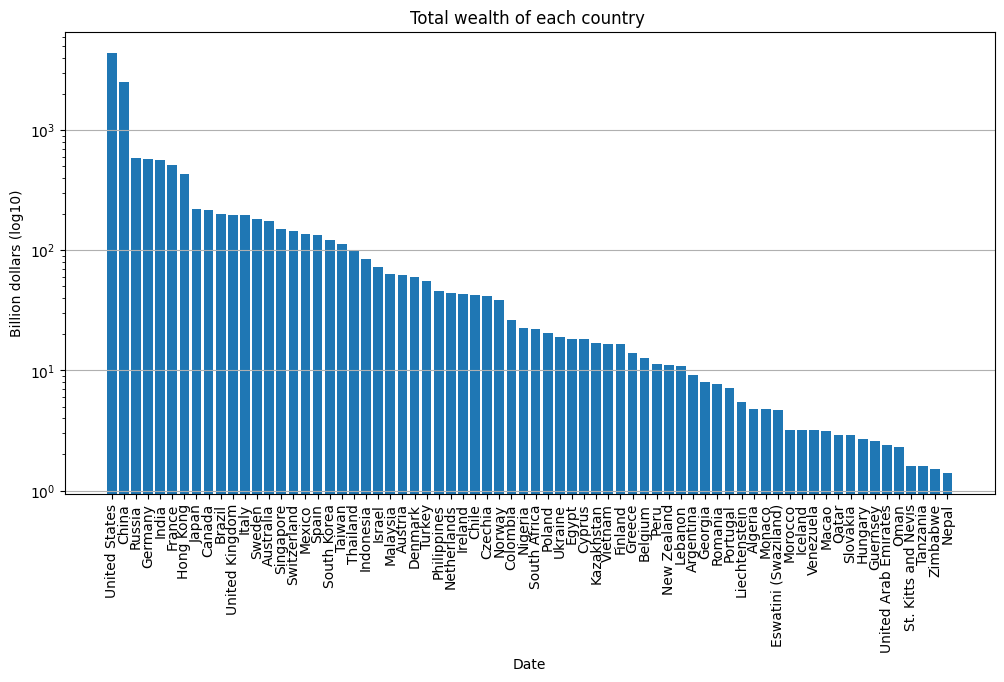

In [19]:
plt.figure(figsize=(12,6))
plt.bar(df1['Country'],(df1['NetWorth'].to_numpy()))
plt.title('Total wealth of each country ')
plt.xlabel('Date')
plt.ylabel('Billion dollars (log10)')
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.yscale('log')
plt.show()

## Display the top ten richest Americans along with their wealth on a chart

In [21]:
df2 = data.copy()
df2['Name'] = data.query('Country == "United States"')['Name']
df2['NetWorth'] = data.query('Country == "United States"')['NetWorth']
df2 = df2.dropna().reset_index()
df2

,level_0,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,3,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
3,4,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
4,5,5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
...,...,...,...,...,...,...,...,...,...
715,2653,2732,Vlad Tenev,1.0,United States,stock trading,2674,34.0,Finance & Investments
716,2660,2739,Vlad Vendrow & family,1.0,United States,software,2674,53.0,Technology
717,2663,2742,J. Wayne Weaver,1.0,United States,Shoes,2674,85.0,Diversified
718,2664,2743,Sandy Weill,1.0,United States,Citigroup,2674,88.0,Finance & Investments


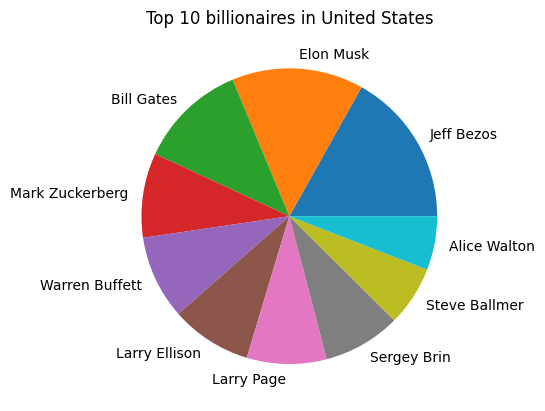

In [22]:
plt.pie(df2['NetWorth'].head(10), labels=df2['Name'].head(10))
plt.title('Top 10 billionaires in United States')
plt.show()

## Ten countries with the least amount of wealth

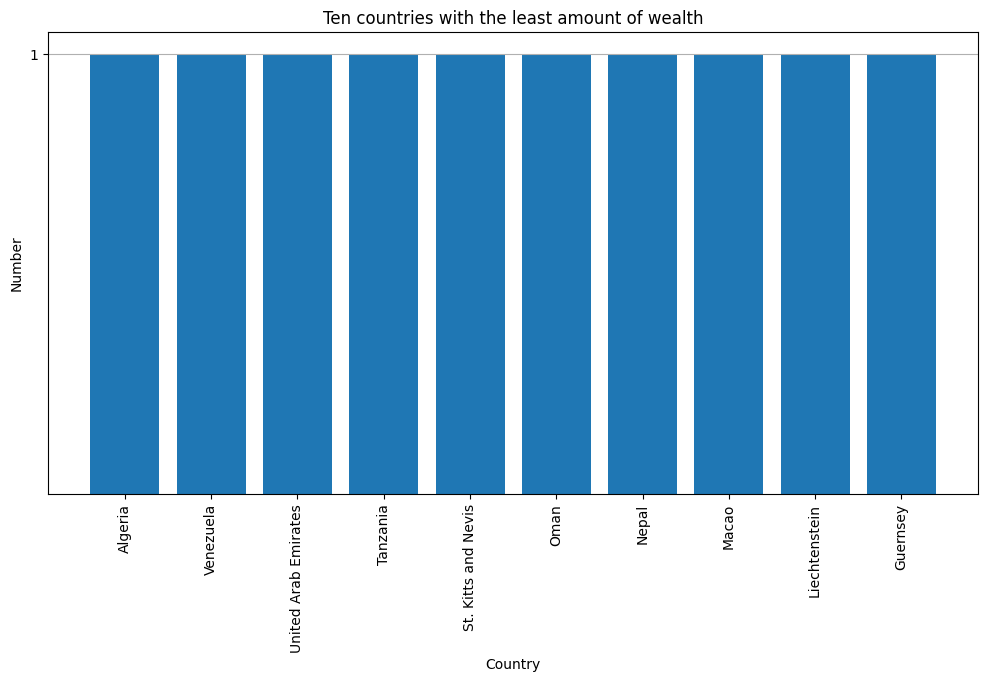

In [43]:
df1 = data.groupby(['Country'])['Name'].nunique().reset_index()
df1 = df1.sort_values(by=['Name'], ascending=True).head(10)
plt.figure(figsize=(12,6))
plt.bar(df1['Country'].to_numpy(dtype=str), df1['Name'].to_numpy())
plt.title('Ten countries with the least amount of wealth')
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.yticks(range(min(df1['Name']),max(df1['Name'])+1))
plt.xlabel('Country')
plt.ylabel('Number')
plt.show()
# df1.head(10)

## other

In [26]:
df = data['Source'].value_counts().head(10).reset_index()
df

,index,Source
0,real estate,169
1,pharmaceuticals,96
2,investments,89
3,diversified,78
4,software,61
5,retail,44
6,hedge funds,42
7,private equity,35
8,consumer goods,32
9,chemicals,32


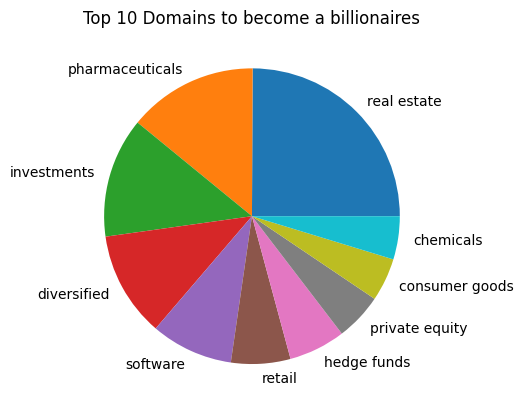

In [29]:
plt.pie(df['Source'], labels=df['index'])
plt.title('Top 10 Domains to become a billionaires')
plt.show()

In [30]:
df = data['Industry'].value_counts().reset_index()
df

,index,Industry
0,Finance & Investments,365
1,Technology,355
2,Manufacturing,317
3,Fashion & Retail,268
4,Healthcare,213
5,Real Estate,211
6,Food & Beverage,204
7,Diversified,180
8,Energy,99
9,Media & Entertainment,92


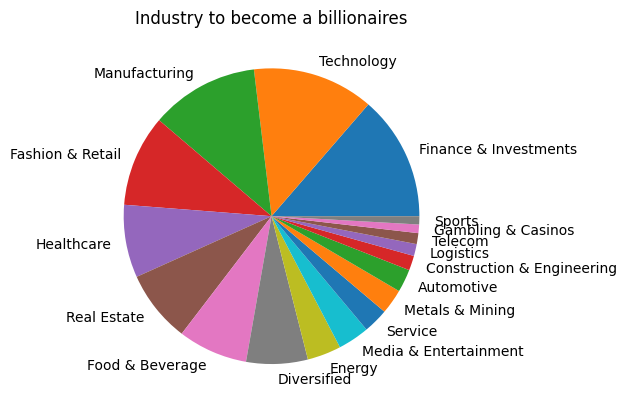

In [33]:
plt.pie(df['Industry'], labels=df['index'])
plt.title('Top 10 Domains to become a billionaires')
plt.show()

In [36]:
df = data['Country'].value_counts().head(10).reset_index()
df

,index,Country
0,United States,720
1,China,610
2,India,134
3,Russia,118
4,Germany,115
5,Hong Kong,68
6,Brazil,61
7,Canada,60
8,United Kingdom,54
9,Italy,49


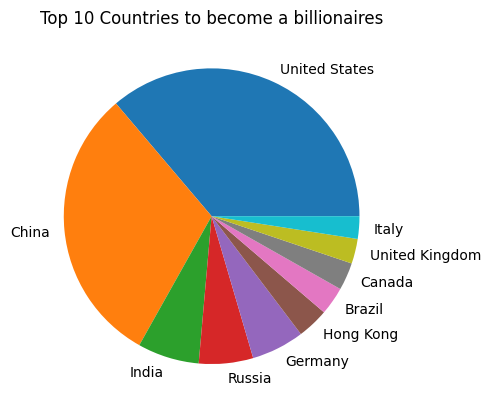

In [37]:
plt.pie(df['Country'], labels=df['index'])
plt.title('Top 10 Countries to become a billionaires')
plt.show()